In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Loandata.csv')

In [4]:
df.drop(columns = ['loan_id'], inplace=True)

In [5]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [6]:
df.columns = df.columns.str.strip()

In [7]:
df['Assets_value'] = df.residential_assets_value + df.commercial_assets_value + df.luxury_assets_value + df.bank_asset_value

In [8]:
df.drop(columns = ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'], inplace = True)

In [9]:
df.isnull().sum()

no_of_dependents    0
education           0
self_employed       0
income_annum        0
loan_amount         0
loan_term           0
cibil_score         0
loan_status         0
Assets_value        0
dtype: int64

In [10]:
df.education.unique()
#df.self_employed.unique()

array([' Not Graduate', ' Graduate'], dtype=object)

In [11]:
df.loan_status.unique()

array([' Rejected', ' Approved'], dtype=object)

In [12]:
def clean_data(s):
    s = s.strip()
    return s

In [13]:
df.education = df.education.apply(clean_data)
df.self_employed = df.self_employed.apply(clean_data)
df.loan_status = df.loan_status.apply(clean_data)

In [14]:
df.education = df.education.replace(['Not Graduate', 'Graduate'],[0,1])
df.self_employed = df.self_employed.replace(['No','Yes'],  [0,1])
df.loan_status = df.loan_status.replace(['Rejected','Approved'],[0,1])

C:\Users\HP\AppData\Local\Temp\ipykernel_9784\3457839926.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.education = df.education.replace(['Not Graduate', 'Graduate'],[0,1])
C:\Users\HP\AppData\Local\Temp\ipykernel_9784\3457839926.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.self_employed = df.self_employed.replace(['No','Yes'],  [0,1])
C:\Users\HP\AppData\Local\Temp\ipykernel_9784\3457839926.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the

In [15]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Assets_value
0,5,0,0,1100000,4300000,10,388,0,9500000
1,0,0,1,4100000,12200000,8,417,0,17000000
2,3,1,0,9100000,29700000,20,506,0,57700000
3,3,1,0,8200000,30700000,8,467,0,52700000
4,5,0,1,9800000,24200000,20,382,0,55000000
...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,0,7400000
4265,0,0,1,3300000,11300000,20,559,1,20000000
4266,2,0,0,6500000,23900000,18,457,0,39000000
4267,1,0,0,4100000,12800000,8,780,1,28800000


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
input_data = df.drop(columns = ['loan_status'])
output_data = df['loan_status']

In [18]:
x_train,x_test,y_train,y_test = train_test_split(input_data,output_data,test_size=0.2)

In [19]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3415, 8), (854, 8), (3415,), (854,))

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
x_train_scaled = scaler.fit_transform(x_train)

In [23]:
x_test_scaled = scaler.fit_transform(x_test)

In [24]:
import joblib
joblib.dump(scaler,'Scaler.pkl')

['Scaler.pkl']

In [25]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

C:\Users\HP\anaconda3\lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [27]:
from sklearn.metrics import classification_report, accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, class_weight = 'balanced', random_state=42)
rf_model.fit(x_train_scaled, y_train)

# Save the model
joblib.dump(rf_model, 'best_rf_model.pkl')

# Evaluate
y_pred = rf_model.predict(x_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred)) 

Accuracy: 0.9812646370023419
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       318
           1       0.99      0.98      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



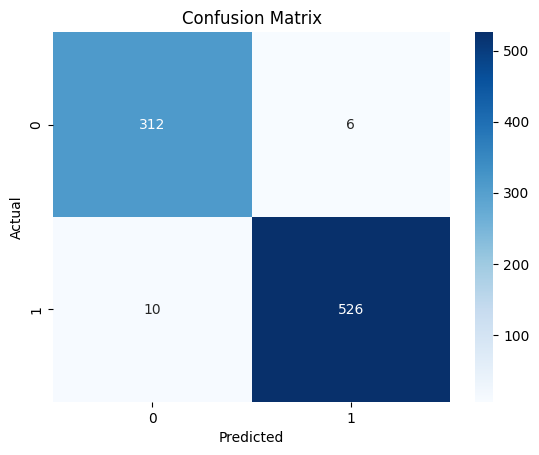

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
import pandas as pd

importances = rf_model.feature_importances_
feature_names = x_train.columns  # or manually list if using scaled data
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

            Feature  Importance
6       cibil_score    0.823997
5         loan_term    0.049547
4       loan_amount    0.041296
7      Assets_value    0.034799
3      income_annum    0.029861
0  no_of_dependents    0.012926
2     self_employed    0.003876
1         education    0.003698


In [ ]:
import pandas as pd
import joblib

# Load the trained model and scaler
model = joblib.load('best_rf_model.pkl')
scaler = joblib.load("Scaler.pkl")

# Function to get user input
def get_input_data():
    no_of_dependents = int(input("Enter number of dependents: "))
    education = int(input("Enter education level (0 for No, 1 for Yes): "))
    self_employed = int(input("Enter self-employed status (0 for No, 1 for Yes): "))
    income_annum = float(input("Enter annual income: "))
    loan_amount = float(input("Enter loan amount: "))
    loan_term = int(input("Enter loan term in years: "))
    cibil_score = int(input("Enter CIBIL score: "))
    Assets_value = float(input("Enter value of total assets value: "))

    # Validation check
    if no_of_dependents > 20 or income_annum < 10000:
        print("🚫 Invalid input: Please enter realistic values.")
        exit()

    return {
        'no_of_dependents': [no_of_dependents],
        'education': [education],
        'self_employed': [self_employed],
        'income_annum': [income_annum],
        'loan_amount': [loan_amount],
        'loan_term': [loan_term],
        'cibil_score': [cibil_score],
        'Assets_value': [Assets_value],
    }

# Function to explain model's decision
def explain_decision(input_data, prediction, prob):
    warnings = []
    explanations = []

    income = input_data['income_annum'][0]
    loan = input_data['loan_amount'][0]
    cibil = input_data['cibil_score'][0]
    term = input_data['loan_term'][0]
    assets = input_data['Assets_value'][0]
    self_employed = input_data['self_employed'][0]

    # Risk Warnings
    if cibil < 650:
        warnings.append("⚠️ Low CIBIL score")
    if loan / income > 3:
        warnings.append("⚠️ High loan-to-income ratio")
    if loan / income > 5:
        warnings.append("⚠️ Very high loan-to-income ratio")
    if term < 4 and loan / income > 2:
        warnings.append("⚠️ Short loan term with high EMI burden")

    # Positive Indicators
    if assets > (0.5 * loan):
        explanations.append("✔️ Strong asset value relative to loan")
    if self_employed == 1:
        explanations.append("✔️ Self-employed: may have alternative income streams")
    if cibil >= 650:
        explanations.append("✔️ Acceptable credit score")
    if loan / income <= 3:
        explanations.append("✔️ Manageable loan-to-income ratio")

    # Show Decision
    print("\n🔍 Risk Warnings:")
    if warnings:
        for w in warnings:
            print(" -", w)
    else:
        print(" - None")

    print("\n📘 Model Explanation:")
    if explanations:
        for e in explanations:
            print(" -", e)
    else:
        print(" - No strong positive indicators")

    print(f"\n🧪 Prediction Confidence: {prob:.2f}")
    print(f"\n🔎 Predicted Loan Status: {'✅ Approved' if prediction[0]==1 else '❌ Rejected'}")

# Main prediction flow
if __name__ == '__main__':
    input_data = get_input_data()
    input_df = pd.DataFrame(input_data)
    input_df_scaled = scaler.transform(input_df)

    prediction = model.predict(input_df_scaled)
    prob = model.predict_proba(input_df_scaled)[0][1]  # Confidence of approval

    # Optional Override Logic (extremely high risk)
    loan = input_data['loan_amount'][0]
    income = input_data['income_annum'][0]
    cibil = input_data['cibil_score'][0]

    if cibil < 500 or (loan / income > 10):
        print("\n🚫 Overridden: Application automatically rejected due to extreme risk.")
    else:
        explain_decision(input_data, prediction, prob)


In [ ]:
import pickle
import pandas as pd
import joblib

# Load the model and scaler
model = joblib.load('best_rf_model.pkl')
scaler = joblib.load("Scaler.pkl")

# Function to get user input
def get_input_data():
    no_of_dependents = int(input("Enter number of dependents: "))
    education = int(input("Enter education level (0 for No, 1 for Yes): "))
    self_employed = int(input("Enter self-employed status (0 for No, 1 for Yes): "))
    income_annum = float(input("Enter annual income: "))
    loan_amount = float(input("Enter loan amount: "))
    loan_term = int(input("Enter loan term in years: "))
    cibil_score = int(input("Enter CIBIL score: "))
    Assets_value = float(input("Enter value of total assets value: "))
    
    return {
        'no_of_dependents': [no_of_dependents],
        'education': [education],
        'self_employed': [self_employed],
        'income_annum': [income_annum],
        'loan_amount': [loan_amount],
        'loan_term': [loan_term],
        'cibil_score': [cibil_score],
        'Assets_value': [Assets_value],
    }

# Get input and preprocess
input_data = get_input_data()
input_df = pd.DataFrame(input_data)
input_df_scaled = scaler.transform(input_df)

# Predict
prediction = model.predict(input_df_scaled)
print(f"Predicted Loan Status: {prediction[0]}")
